##**Defining the Question.**

###a) Specifying the Question

You have been tasked to study the factors that affect housing prices using the data provided. Then, create a model that would allow the company to accurately predict the  prices of houses

###b) Defining the Metric for Success

Analyze data.
Normalize data .
Create accurate models

###c) Understanding the context

The data contains one dataset with the prices of houses from 1900 to 2015. It has 20 columns containing variables that will be used to predict the sales of prices

Task:to predict the price of houses

###d) Recording the Experimental Design (CRISP- DM methodology)


*   Get the data
*   understand the data

*   Clean the data
*   Explore the data

*   Create models
*   Evaluate model perfomance








##**Data Relevance**

###Loading the Libraries

In [0]:
#import pandas libraries
import pandas as pd

#Import numpy libraries
import numpy as np
import scipy as sp

#import matplot libraries
import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn libraries
import seaborn as sns

# Import sklearn linear_model libraries 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error,  r2_score
from sklearn.linear_model import Ridge
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score 
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV



In [13]:
df = pd.read_csv('house_data.csv')
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##**Access information about our datasets**

In [14]:
#Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

All the variables have the correct datatypes

In [15]:
# Check more infomation on our data e.g measures of central tendency
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [16]:
#Show the shape of the datasets
print(df.shape)


(21613, 20)


In [17]:
#Check missing values
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values

##**Exploratory Data Analysis**

### Checking for anomalies

In [18]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

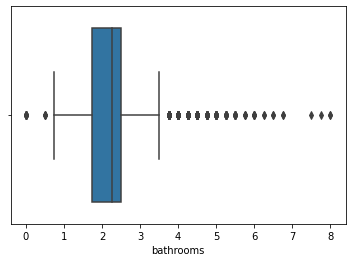

In [19]:

#boxplots for bathroom column

sns.boxplot(df['bathrooms'])
plt.show()

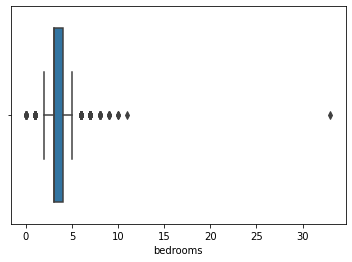

In [20]:
#boxplots for bedroom column
sns.boxplot(df['bedrooms'])
plt.show()

There is one outlier that is so extreme. Let's visualize the column

In [21]:
#View the row that has the outlier 
outlier = df[df["bedrooms"] >= 30]
outlier

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


The row contains 33 bedrooms, is a grade 7, price is relevant to our data.It may have been an input error so we drop it so that our data ceases to be extremely skewed. 

In [22]:
#drop the row by index

df=df.drop(df.index[15870])

# Confirm the index row has been deleted.
df.shape

(21612, 20)

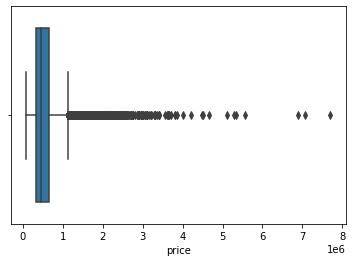

In [23]:
sns.boxplot(df['price'])

The dataset contains houses that are very expensive, we might not tell if they are outluers, hence we will not drop them
 

### Checking for duplicates

In [24]:
# Checking for sum of duplicated rows
df.duplicated().sum()

3

In [25]:
#Drop the 3 duplicated rows
df.drop_duplicates(keep=False,inplace=True) 
df.duplicated().sum()

0

Most houses are 3 bedroomed, have 2 bathrooms,and price is about 450000, conditions are 3 and mostly built in 1975

###**Univariate Analysis**

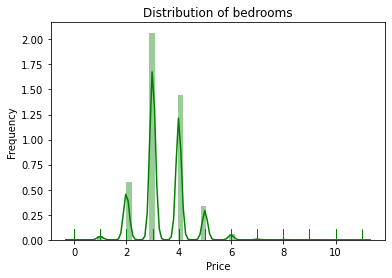

<Figure size 1080x1080 with 0 Axes>

In [26]:
# Plot using histograms
sns.distplot(df["bedrooms"],color="green",rug=True)
plt.title("Distribution of bedrooms")
plt. ylabel('Frequency')
plt. xlabel('Price')
plt.figure(figsize=(15,15))
plt.show()

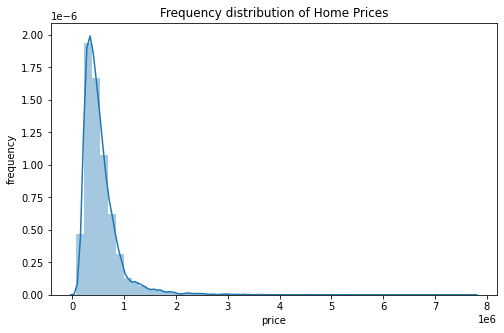

In [27]:
#  A graphical view of the home prices
plt.figure(figsize = (8,5))

sns.distplot(df['price']) 
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Frequency distribution of Home Prices')
plt.show()

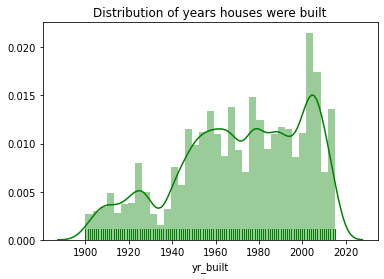

In [28]:

sns.distplot(df["yr_built"],color="green",rug=True)
plt.title("Distribution of years houses were built",color='black')
plt.show()

Most houses were built from 1940

###**Bivariate Analysis**

In [29]:
group_data = df.groupby(['yr_built','bedrooms'])['price'].max()
pd.DataFrame(group_data).head(20)

price
yr_built bedrooms           
1900     1          415000.0
         2         1700000.0
         3         1330000.0
         4         1400000.0
         5          870000.0
         6         1300000.0
1901     2          780000.0
         3          700000.0
         4          865000.0
         5         1230000.0
         7          599000.0
         8          680000.0
1902     2          751750.0
         3          900000.0
         4         1330000.0
         5         1990000.0
         6          665000.0
1903     1          170000.0
         2          650000.0
         3         1020000.0

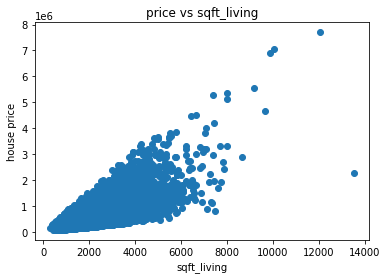

In [30]:
# Plot scatter plot
plt.scatter(df["sqft_living"],df["price"])
plt.ylabel("house price")
plt.xlabel("sqft_living")
plt.title("price vs sqft_living")
plt.show()

The scatter plot shows a positive linear correlation as the increase in the sqft_ living increases the house prices

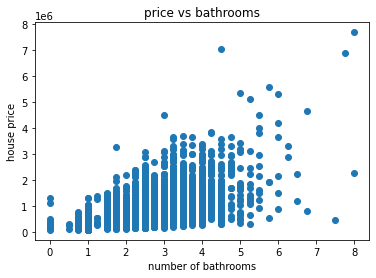

In [31]:
# Plot scatter plot
plt.scatter(df["bathrooms"],df["price"])
plt.ylabel("house price")
plt.xlabel("number of bathrooms")
plt.title("price vs bathrooms")
plt.show()

The plots throughout the scatterplot,this shows that number of bathrooms doesn't affect the house price. There are houses with more bathrooms but price is relatively lower.

##**Multivariate Analysis**

In [32]:
print(df[['floors','bedrooms','sqft_living']].sort_values('floors',ascending=False).head(10))

print('----------------------------------------------')


print('Highest floor is',df['floors'].max())

       floors  bedrooms  sqft_living
15424     3.5         2         1730
14885     3.5         3         1730
11594     3.5         3         1760
875       3.5         0         3064
18477     3.5         8         7710
20308     3.5         2         1310
20772     3.5         3         1400
10077     3.5         3         1440
20546     3.0         3         1300
20554     3.0         3         1408
----------------------------------------------
Highest floor is 3.5


In [33]:
df.groupby(['floors','bedrooms','sqft_living']).max()

id      price  ...  sqft_living15  sqft_lot15
floors bedrooms sqft_living                         ...                           
1.0    0        290          3980300371   142000.0  ...           1620       22850
                384          1222029077   265000.0  ...           1920      224341
                390          6896300380   228000.0  ...           2170        6000
                844          9543000205   139950.0  ...           1380        9600
       1        370          2856101479   276000.0  ...           1340        5000
...                                 ...        ...  ...            ...         ...
3.5    3        1400         1972200428   563500.0  ...           1350        1312
                1440         1972202010   435000.0  ...           1440        1350
                1730         8673400177   525000.0  ...           1370        1185
                1760         3180100023   544000.0  ...           1700        1721
       8        7710         1346300150  3300000.0  ...           4210        8325

[4164 rows x 17 columns]

In [34]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016800,0.002599,0.005009,-0.012238,-0.132103,0.018407,-0.002716,0.011968,-0.023508,0.008037,-0.010905,-0.004995,0.021028,-0.016477,-0.008017,-0.001799,0.020725,-0.002870,-0.138770
price,-0.016800,1.000000,0.315451,0.525155,0.702060,0.089663,0.256818,0.266334,0.397591,0.036376,0.667507,0.605596,0.323856,0.053990,0.126568,-0.053162,0.306920,0.021574,0.585416,0.082463
bedrooms,0.002599,0.315451,1.000000,0.529265,0.591475,0.032799,0.181124,-0.006612,0.081728,0.025375,0.366576,0.490638,0.309456,0.159368,0.019318,-0.157200,-0.010586,0.133883,0.402617,0.030379
bathrooms,0.005009,0.525155,0.529265,1.000000,0.754707,0.087756,0.500678,0.063749,0.188039,-0.124862,0.664993,0.685356,0.283877,0.505966,0.051015,-0.203787,0.024627,0.223038,0.568690,0.087201
sqft_living,-0.012238,0.702060,0.591475,0.754707,1.000000,0.172831,0.353946,0.103821,0.284665,-0.058735,0.762731,0.876605,0.435087,0.318137,0.055261,-0.199431,0.052535,0.240206,0.756417,0.183279
sqft_lot,-0.132103,0.089663,0.032799,0.087756,0.172831,1.000000,-0.005151,0.021597,0.074792,-0.008953,0.113663,0.183536,0.015263,0.053123,0.007709,-0.129644,-0.085670,0.229578,0.144626,0.718555
floors,0.018407,0.256818,0.181124,0.500678,0.353946,-0.005151,1.000000,0.023721,0.029193,-0.263727,0.458108,0.523846,-0.245621,0.489358,0.005964,-0.058911,0.049613,0.125235,0.279808,-0.011244
waterfront,-0.002716,0.266334,-0.006612,0.063749,0.103821,0.021597,0.023721,1.000000,0.402128,0.016664,0.082793,0.072083,0.080585,-0.026161,0.093015,0.030271,-0.014266,-0.041901,0.086473,0.030699
view,0.011968,0.397591,0.081728,0.188039,0.284665,0.074792,0.029193,0.402128,1.000000,0.045723,0.251429,0.167659,0.277059,-0.053031,0.102495,0.084856,0.005955,-0.078733,0.280362,0.072576
condition,-0.023508,0.036376,0.025375,-0.124862,-0.058735,-0.008953,-0.263727,0.016664,0.045723,1.000000,-0.144593,-0.158133,0.173989,-0.361241,-0.061091,0.002846,-0.015108,-0.106447,-0.092790,-0.003410


In [35]:
house_df = df.drop(["id","zipcode","lat","long","sqft_living","sqft_lot","sqft_above"],axis=1)
house_df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1.0,0,0,3,7,0,1955,0,1340,5650
1,538000.0,3,2.25,2.0,0,0,3,7,400,1951,1991,1690,7639
2,180000.0,2,1.00,1.0,0,0,3,6,0,1933,0,2720,8062
3,604000.0,4,3.00,1.0,0,0,5,7,910,1965,0,1360,5000
4,510000.0,3,2.00,1.0,0,0,3,8,0,1987,0,1800,7503


##**Detecting Multicolinearity**

In [36]:
# Find the correlation of the variables
correlation=house_df.corr()
correlation

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.315451,0.525155,0.256818,0.266334,0.397591,0.036376,0.667507,0.323856,0.053990,0.126568,0.585416,0.082463
bedrooms,0.315451,1.000000,0.529265,0.181124,-0.006612,0.081728,0.025375,0.366576,0.309456,0.159368,0.019318,0.402617,0.030379
bathrooms,0.525155,0.529265,1.000000,0.500678,0.063749,0.188039,-0.124862,0.664993,0.283877,0.505966,0.051015,0.568690,0.087201
floors,0.256818,0.181124,0.500678,1.000000,0.023721,0.029193,-0.263727,0.458108,-0.245621,0.489358,0.005964,0.279808,-0.011244
waterfront,0.266334,-0.006612,0.063749,0.023721,1.000000,0.402128,0.016664,0.082793,0.080585,-0.026161,0.093015,0.086473,0.030699
view,0.397591,0.081728,0.188039,0.029193,0.402128,1.000000,0.045723,0.251429,0.277059,-0.053031,0.102495,0.280362,0.072576
condition,0.036376,0.025375,-0.124862,-0.263727,0.016664,0.045723,1.000000,-0.144593,0.173989,-0.361241,-0.061091,-0.092790,-0.003410
grade,0.667507,0.366576,0.664993,0.458108,0.082793,0.251429,-0.144593,1.000000,0.168514,0.446958,0.014325,0.713210,0.119277
sqft_basement,0.323856,0.309456,0.283877,-0.245621,0.080585,0.277059,0.173989,0.168514,1.000000,-0.132978,0.071323,0.200414,0.017253
yr_built,0.053990,0.159368,0.505966,0.489358,-0.026161,-0.053031,-0.361241,0.446958,-0.132978,1.000000,-0.224595,0.326342,0.071029


In [37]:
# use this correlations above to compute VIF(Variance Inflation Factor)
# create a new data frame with the inverse of the matrix above

#Compute the variation inflation factor
vif = pd.DataFrame(np.linalg.inv(correlation.values), index  = correlation.index, columns = correlation.columns)
vif

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,2.678227,0.095827,-0.515595,-0.193265,-0.386013,-0.233783,-0.086024,-1.326061,-0.260585,0.836509,-0.034922,-0.449454,0.033399
bedrooms,0.095827,1.521932,-0.744728,-0.017526,0.029484,0.123513,-0.059432,0.011167,-0.237297,0.194887,0.036750,-0.315627,0.046986
bathrooms,-0.515595,-0.744728,3.141242,-0.756117,0.055060,0.011133,-0.111714,-0.424780,-0.664123,-0.991299,-0.258704,-0.224470,-0.044480
floors,-0.193265,-0.017526,-0.756117,1.904902,0.013121,-0.040063,0.141576,-0.363449,0.706072,-0.331479,-0.056231,0.244675,0.117142
waterfront,-0.386013,0.029484,0.055060,0.013121,1.256503,-0.458313,-0.002492,0.206568,0.064634,-0.134913,-0.062188,0.084149,-0.010137
view,-0.233783,0.123513,0.011133,-0.040063,-0.458313,1.423849,0.000023,-0.055835,-0.262364,0.124796,-0.029257,-0.209695,-0.034198
condition,-0.086024,-0.059432,-0.111714,0.141576,-0.002492,0.000023,1.223726,0.036707,-0.072978,0.443233,0.196467,0.060523,-0.022744
grade,-1.326061,0.011167,-0.424780,-0.363449,0.206568,-0.055835,0.036707,3.433395,0.000659,-0.702652,-0.030013,-1.100077,-0.018068
sqft_basement,-0.260585,-0.237297,-0.664123,0.706072,0.064634,-0.262364,-0.072978,0.000659,1.602851,0.183155,0.010348,0.098337,0.052520
yr_built,0.836509,0.194887,-0.991299,-0.331479,-0.134913,0.124796,0.443233,-0.702652,0.183155,2.248468,0.471675,-0.152556,-0.050389


In [38]:
value= vif.values
(value > 5).any()

False

All the variables have VIF of less than 5 hence can be used for prediction.

##**Normalization of the data**

In [0]:
#select the attributes and the label
X = house_df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']].values
y = np.log(house_df['price'])



In [0]:
# splitting using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# use standard scalar normalization to normalize our feature set. 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##**Multiple Linear Regression**

In [70]:
regressor = LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
#Check the intercept
regressor.intercept_

13.048079384489633

In [72]:
#Check the coefficient
regressor.coef_

array([-4.23593212e-03,  8.37048990e-02,  7.25063753e-02,  3.22985365e-02,
        2.86414078e-02,  2.64607857e-02,  2.68505289e-01,  5.76228783e-02,
       -1.66866596e-01,  7.10273591e-03,  1.04116714e-01,  7.93911243e-05])

In [73]:
# Predict the model
y_pred = regressor.predict(X_test)
y_pred

array([12.93958509, 12.88760611, 12.78439767, ..., 12.33585618,
       13.25662375, 12.69577144])

In [81]:
#check model accuracy 

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Mean price", np.mean(y))

Root Mean Squared Error: 0.6915359498690568
Mean price 13.04781752172756


Since the root mean squared is less than 10 % of the the mean of the label, then the model is pretty good

In [75]:
#Check for the coefficient of multiple determination for multiple regression.
r2_score(y_test,y_pred)

0.6552919016043568

The r2 = 65% shows that  the fitted values are almost equal to the observed values and, therefore, most of  the data points fall on the regression line.

However,r2 cannot determine whether the coefficient estimates and predictions are biased, which is why we proceed to assess the residual plots.

##**Residual plots: Heteroskedasticity Testing**

In [82]:
#Calculating the residuals
residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
print(pd.DataFrame(residuals).describe())
print('-------------------------------------------')
print(residuals.mean())

             price
count  4322.000000
mean     -0.002596
std       0.691611
min      -3.360185
25%      -0.447786
50%       0.004150
75%       0.427403
max       3.344816
-------------------------------------------
-0.0025962207277773846


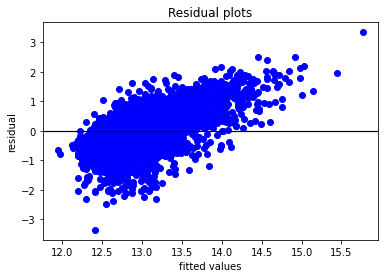

In [86]:
plt.scatter(y_pred, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black', linewidth=1.2)
plt.title('Residual plots')
plt.show()



*   There are no patterns from the plot above





###**Heteroskedasticity**

In [87]:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# compute the critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# If the test_result is greater than the critical value, reject the null hypothesis. 
# This means there are patterns to the variance of the data

# Otherwise, identify no patterns, and  accept the null hypothesis 
# The variance is homogeneous across our data

if(test_result > critical_value):
    print("the variances are unequal, and the model should be reassessed")
else:
    print("The variances are homogeneous!")

The variances are homogeneous!


###**Quantile Regression**

In [0]:
#create a train and a test for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [91]:
# Find the regression coefficients for the conditioned median, 0.5 quantile

import statsmodels.formula.api as smf
mod = smf.quantreg('y ~ X', house_df)
res = mod.fit(q=.5)

print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4020
Model:                       QuantReg   Bandwidth:                     0.05420
Method:                 Least Squares   Sparsity:                       0.7940
Date:                Sun, 07 Jun 2020   No. Observations:                21606
Time:                        14:16:08   Df Residuals:                    21593
                                        Df Model:                           12
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.6123      0.254     89.032      0.000      22.114      23.110
X[0]          -0.0126      0.004     -3.434      0.001      -0.020      -0.005
X[1]           0.1025      0.006     16.755      0.000       0.090       0.114
X[2]           0.1439      0.007     20.924      0.0

In [92]:
house_df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [0]:
new_house_df = house_df.copy()

In [94]:

cols = new_house_df.columns[new_house_df.dtypes.eq('object')]
cols

Index([], dtype='object')

###**Ridge Regression**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [0]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=5)

In [100]:
#determine the strength of the model using best params and best score
search.fit(X_train,y_train)
search.best_params_
{'alpha': 0.001}
abs(search.best_score_)

0.09688839519417827

In [104]:
# Create another model
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

0.09728264229591489


In [105]:
# Predict using the model
y_pred=ridge.predict(X)
y_pred

array([12.63855871, 13.07461655, 12.74565125, ..., 12.41024569,
       12.90042766, 12.41588854])

In [106]:
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,new_house_df.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 0.141704400356556,
 'bedrooms': 0.10324192772114471,
 'condition': 0.23000450582574206,
 'floors': 0.37473848926249015,
 'grade': 0.00013718654697447323,
 'price': -0.006995715711964106,
 'sqft_basement': -0.005619178672971617,
 'sqft_living15': -3.64099704189029e-08,
 'view': 0.04135057915295925,
 'waterfront': 0.037953746611213465,
 'yr_built': 1.7896475432674518e-05,
 'yr_renovated': 0.00014968639067743046}



*   The number of floors has a large impact on the response variable 














###**Lasso regression**

Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients

In [0]:

#Scale our data

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [108]:

# Creating lasso object
lasso = linear_model.Lasso() 


# Fitting the models
lasso.fit(X, y) 


print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_)

lasso score: 0.0
lasso MSE: 0.2776031344216489
lasso coef: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [109]:
#Splitting the data into training and test sets and choose your parameters with GridSearch
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.4796908232769117
linear score: 0.6518460522705258
lasso MSE: 0.14415163705307338
linear MSE: 0.09645603759628414
lasso best estimator coef: [ 0.          0.0009536   0.          0.          0.0021813   0.
  0.2218897   0.01524368 -0.          0.          0.06413597  0.        ]
linear coef: [-0.00728136  0.08083146  0.07354091  0.02797867  0.02929477  0.02679547
  0.26936119  0.06065812 -0.16493131  0.00467494  0.10336572 -0.00140629]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 842.594799376084, tolerance: 0.4800459565012147
  positive)


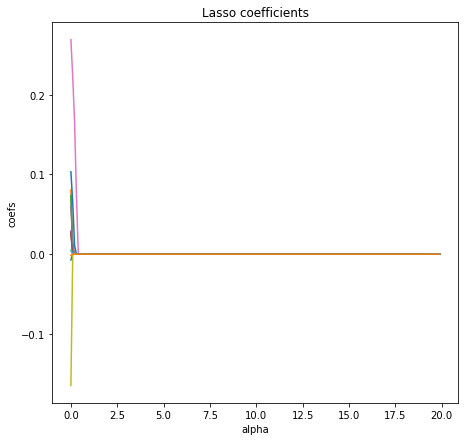

In [112]:
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array

alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()


###**Elastic Net Regression**


In [0]:
#In the grid ,we need to set several values of this argument.

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [114]:
#We will now fit our model and display the best parameters and the best results we can get with that setup.

search.fit(X,y)
print(search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


0.09833575102756045

the best hyperparameters was an alpha set to 0.00001 and a l1_ratio of 0.8. With these settings we got an MSE of 0.098.

 Which means that elastic net is doing worse than linear regression. For clarity, we will set our hyperparameters to the recommended values and run on the data.

In [115]:
#We create the second model to see accuracy change
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

0.0976955581486225


###**Future questions**



1. since most of our houses were relatively expenissive, did it affect the prediction output?
2. Which other models provide better accuracy for price prediction?



###**Possible Solution**



1.   Get data which has widespread variety of prices to avoid biasness of prediction results.


